The use of a perceptron is similar to that of logistic regression; we use it to make binary classifications. However, unlike logistic regression, which uses the sigmoid function to scale our predictions between (0, 1), a perceptron uses the binary step function.

## Training
We will use gradient descent to train this model. First, we will make a linear model using the formula (2-D for explanation purposes) $y = m.X + b$. After this, we will predict the class using the binary step function, which is:
$$
 \hat{y}=\left\{
\begin{array}{ll}
      0 & \text{if}~y < 0 \\
      1 & \text{if}~y \ge 0 \\
\end{array}\ 
\right.  $$

now the change in weight and bias is given by:
<br>
$\Delta w = \alpha \times X^T(\hat{y} - y)$
<br>
$\Delta b = \alpha \times (\hat{y} - y)$

after this we will update the weights and bias:
<br>
$w = w - \Delta w$
<br>
$b = b - \Delta b$

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn.model_selection import train_test_split
np.random.seed(123)

In [138]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y = y.reshape(n_samples, )

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.step_function(linear_model)
            loss = y_pred - y

            dw = self.lr * np.dot(X.T, loss)
            db = self.lr * np.sum(loss)

            self.weights -= dw
            self.bias -= db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.step_function(linear_model)
        return y_pred
    
    def step_function(self, x):
        return np.array([1 if i > 0 else 0 for i in x])
        

In [139]:
bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

per = Perceptron(learning_rate=0.001)

per.fit(X_train, y_train)
y_pred = predictions = per.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_test == y_pred)/len(y_test)

acc = accuracy(y_pred, y_test)
print("Accuracy: ", acc)

Accuracy:  0.9298245614035088


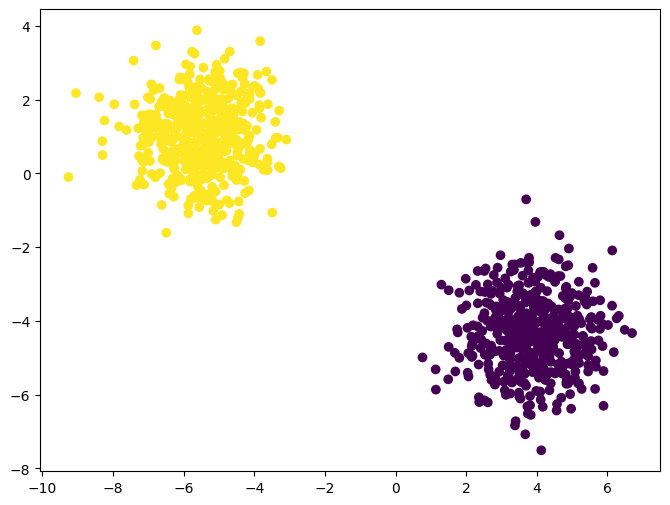

In [140]:
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)

In [149]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 100.0%
test accuracy: 100.0%


In [147]:
def plot_hyperplane(X, y, weights, bias):
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.xlim(-10,8)
    plt.ylim(-9,5)
    plt.title("Dataset and fitted decision hyperplane")
    plt.show()

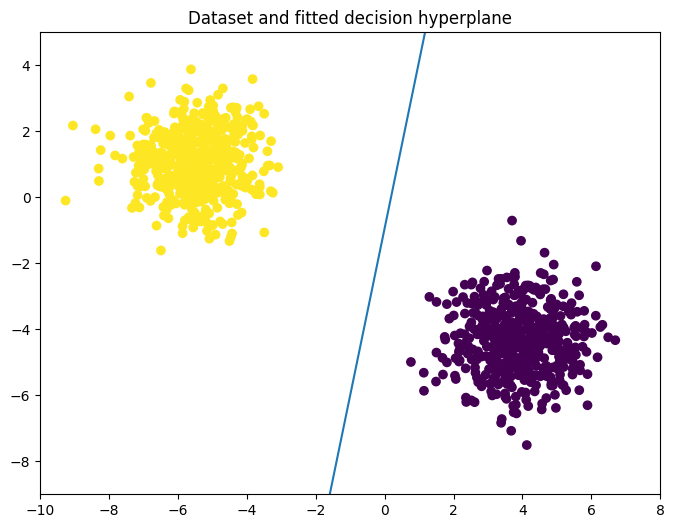

In [148]:
plot_hyperplane(X, y, p.weights, p.bias)